# Using kNN for regression

In [1]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
import numpy as np


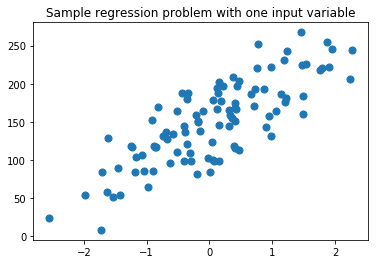

In [29]:
# synthetic dataset for simple regression
# make_regression: Generate a random regression problem.
# or load your data
plt.figure()
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o',  s=50)
plt.show()


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X_R1,y_R1, random_state=0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'.format(knnreg.score(X_test,y_test)))

[ 231.70974697  148.35572605  150.58852659  150.58852659   72.14859259
  166.50590948  141.90634426  235.57098756  208.25897836  102.10462746
  191.31852674  134.50044902  228.32181403  148.35572605  159.16911306
  113.46875166  144.03646012  199.23189853  143.19242433  166.50590948
  231.70974697  208.25897836  128.01545355  123.14247619  141.90634426]
R-squared test score: 0.425


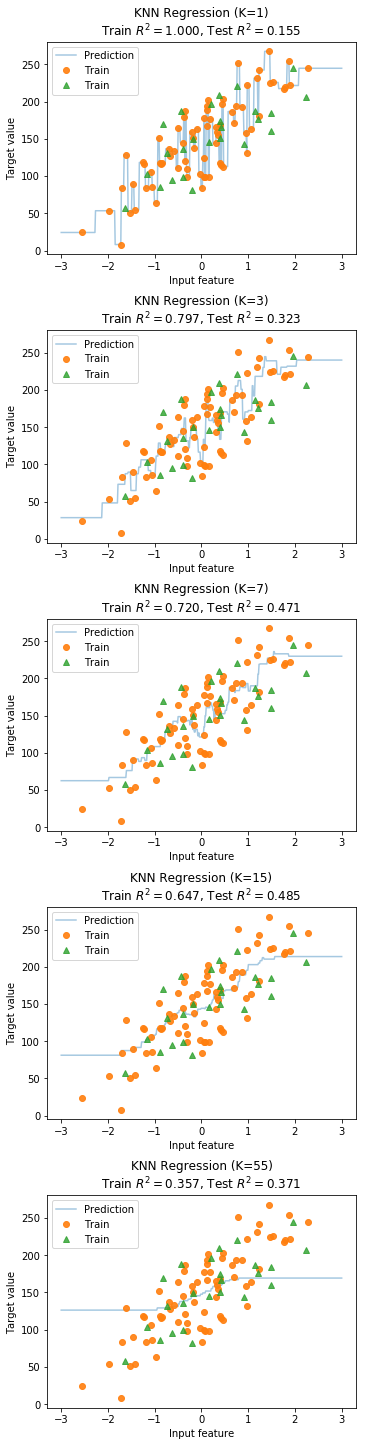

In [31]:
fig, subaxes = plt.subplots(5,1,figsize=(5,20))
X_predict_input = np.linspace(-3,3,500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_R1,y_R1,random_state = 0)

for thisaxis, K in zip(subaxes,[1,3,7,15,55]):
    knnreg = KNeighborsRegressor(n_neighbors=K).fit(X_train, y_train)
    y_predict_output = knnreg.predict(X_predict_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_predict_input, y_predict_output, label='Prediction',alpha=0.4)
    thisaxis.plot(X_train, y_train,'o',label='Train', alpha=0.9)
    thisaxis.plot(X_test, y_test, '^', label='Train', alpha=0.8)
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN Regression (K={})\nTrain $R^2 = {:.3f}$, Test $R^2 = {:.3f}$'
                       .format(K,train_score, test_score))
    thisaxis.legend()

plt.tight_layout(pad=0.4,w_pad=0.5, h_pad=1.0)    
plt.show()